In [1]:
import pandas as pd
import datetime

C:\Users\doanb\AppData\Local\Temp\ipykernel_20092\3813427381.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Video_ID,Channel_ID,Publish_Date,Video_Title,Description,View_Count,Like_Count,Share_Count,Comment_Count
0,3fg8pyLKvXE,UCOmHUn--16B90oW2L6FRR3A,2016-07-06T01:00:06Z,BLACKPINK - DANCE PRACTICE VIDEO,CHOREOGRAPHY BY : PARRIS GOEBEL\n\n#YG #BLACKP...,88537909,2932163,NaN,90705
1,klbdGv5Bz3U,UCOmHUn--16B90oW2L6FRR3A,2023-04-07T14:21:36Z,붉게 타버려진 #지수 와 #영지 🌹 #JISOO_FLOWER #지수꽃 #ME #JI...,#JISOO_FLOWER #지수꽃 #ME #JISOO #BLACKPINK #블랙핑크...,73028572,3971659,NaN,24199
2,nzLq6D72PKU,UCOmHUn--16B90oW2L6FRR3A,2023-04-06T04:00:32Z,난 하얀 꽃잎처럼 날아가🤍 #JISOO_FLOWER #지수꽃 #ME #JISOO #...,#JISOO_FLOWER #지수꽃 #ME #JISOO #지수 #BLACKPINK #...,59857790,2626880,NaN,15422
3,UyruJZ9YrjE,UCOmHUn--16B90oW2L6FRR3A,2023-04-03T04:00:04Z,Dance with #ME 🌺 #JISOO_FLOWER #지수꽃 #JISOO #지수...,#JISOO_FLOWER #지수꽃 #JISOO #지수 #BLACKPINK #블랙핑크...,52338931,2970825,NaN,18514
4,LLWZOF7DiVg,UCOmHUn--16B90oW2L6FRR3A,2023-03-28T15:00:21Z,JISOO - ‘꽃(FLOWER)’ M/V TEASER,#JISOO #지수 #BLACKPINK #블랙핑크 #FIRSTSINGLEALBUM ...,18857466,1804536,NaN,127273


In [4]:
column_to_drop = ["Channel_ID", "Video_ID"]
df.drop(columns=column_to_drop, axis=1, inplace=True)

In [5]:
df.shape

(50, 7)

In [6]:
# Áp dụng định dạng chuỗi cho cột 'Publish_Date'
df['Publish_Date'] = pd.to_datetime(df['Publish_Date']).dt.strftime('%Y-%m-%dT%H:%M:%SZ')

In [7]:
df['Publish_Date'] = pd.to_datetime(df['Publish_Date'])
time = []
date = []
year = []
month = []
day = []

for i in range(df.shape[0]):
    t = df['Publish_Date'][i].time()
    d = df['Publish_Date'][i].date()
    y = df['Publish_Date'][i].date().year
    m = df['Publish_Date'][i].date().month
    da = df['Publish_Date'][i].date().day

    time.append(t)
    date.append(d)
    year.append(y)
    month.append(m)
    day.append(da)

df.drop('Publish_Date', inplace=True, axis=1)
df['Publish_Time'] = time
df['Publish_Date'] = date
df['Publish_Year'] = year
df['Publish_Month'] = month
df['Publish_Day'] = day


In [8]:
df.head()

,Video_Title,Description,View_Count,Like_Count,Share_Count,Comment_Count,Publish_Time,Publish_Date,Publish_Year,Publish_Month,Publish_Day
0,BLACKPINK - DANCE PRACTICE VIDEO,CHOREOGRAPHY BY : PARRIS GOEBEL\n\n#YG #BLACKP...,88537909,2932163,NaN,90705,01:00:06,2016-07-06,2016,7,6
1,붉게 타버려진 #지수 와 #영지 🌹 #JISOO_FLOWER #지수꽃 #ME #JI...,#JISOO_FLOWER #지수꽃 #ME #JISOO #BLACKPINK #블랙핑크...,73028572,3971659,NaN,24199,14:21:36,2023-04-07,2023,4,7
2,난 하얀 꽃잎처럼 날아가🤍 #JISOO_FLOWER #지수꽃 #ME #JISOO #...,#JISOO_FLOWER #지수꽃 #ME #JISOO #지수 #BLACKPINK #...,59857790,2626880,NaN,15422,04:00:32,2023-04-06,2023,4,6
3,Dance with #ME 🌺 #JISOO_FLOWER #지수꽃 #JISOO #지수...,#JISOO_FLOWER #지수꽃 #JISOO #지수 #BLACKPINK #블랙핑크...,52338931,2970825,NaN,18514,04:00:04,2023-04-03,2023,4,3
4,JISOO - ‘꽃(FLOWER)’ M/V TEASER,#JISOO #지수 #BLACKPINK #블랙핑크 #FIRSTSINGLEALBUM ...,18857466,1804536,NaN,127273,15:00:21,2023-03-28,2023,3,28


In [9]:
df.describe()

,View_Count,Like_Count,Share_Count,Comment_Count,Publish_Year,Publish_Month,Publish_Day
count,5.000000e+01,5.000000e+01,0.0,50.000000,50.000000,50.000000,50.000000
mean,2.774501e+07,1.778071e+06,NaN,65780.880000,2020.720000,6.920000,13.960000
std,2.551111e+07,1.365349e+06,NaN,100203.480555,2.020709,2.919603,8.928194
min,8.250950e+05,1.833450e+05,NaN,1675.000000,2016.000000,1.000000,1.000000
25%,1.176069e+07,8.877755e+05,NaN,17049.000000,2019.000000,4.000000,6.000000
50%,2.222553e+07,1.378858e+06,NaN,31988.000000,2021.000000,7.000000,13.000000
75%,3.211679e+07,2.610934e+06,NaN,64583.750000,2023.000000,9.000000,21.750000
max,1.461076e+08,8.396434e+06,NaN,605092.000000,2023.000000,12.000000,31.000000


In [10]:
df[['Like_Count', 'View_Count', 'Comment_Count']].sum()

Like_Count         88903536
View_Count       1387250373
Comment_Count       3289044
dtype: int64

### Visualization

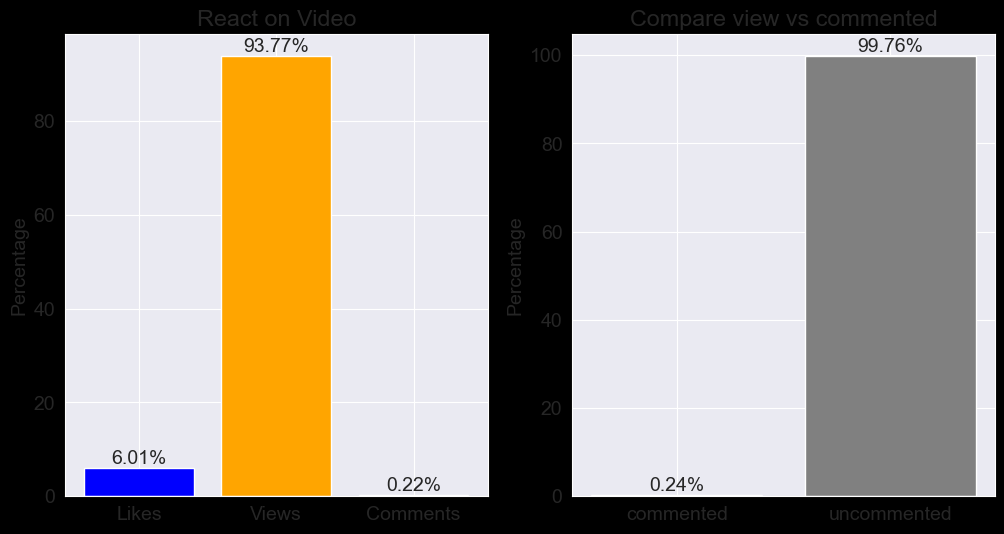

In [11]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['figure.facecolor'] = '#000000'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First Bar Chart
bar_vars1 = ['Likes', 'Views', 'Comments']
bar_values1 = [df['Like_Count'].sum(), df['View_Count'].sum(), df['Comment_Count'].sum()]
total1 = sum(bar_values1)
percentage1 = [value / total1 * 100 for value in bar_values1]
bars1 = ax1.bar(bar_vars1, percentage1, color=['blue', 'orange', 'green'])
ax1.set_title('React on Video')
ax1.set_ylabel('Percentage')


for bar, percentage in zip(bars1, percentage1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Second Bar Chart
bar_vars2 = ['commented', 'uncommented']
bar_values2 = [df['Comment_Count'].sum(), df['View_Count'].sum() - df['Comment_Count'].sum()]
total2 = sum(bar_values2)
percentage2 = [value / total2 * 100 for value in bar_values2]
bars2 = ax2.bar(bar_vars2, percentage2, color=['purple', 'gray'])
ax2.set_title('Compare view vs commented')
ax2.set_ylabel('Percentage')

# thêm nhãn % 
for bar, percentage in zip(bars2, percentage2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()
